<a href="https://colab.research.google.com/github/tzf101/BDA-Bangla-Text-Data-Augmentation/blob/main/evaluation/test_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading BanglaBERT Model

In [20]:
!git clone https://github.com/csebuetnlp/banglabert.git

fatal: destination path 'banglabert' already exists and is not an empty directory.


In [21]:
!pip install git+https://github.com/csebuetnlp/normalizer

  Cloning https://github.com/csebuetnlp/normalizer to /tmp/pip-req-build-2vqu_04c
  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer /tmp/pip-req-build-2vqu_04c
  Resolved https://github.com/csebuetnlp/normalizer to commit d405944dde5ceeacb7c2fd3245ae2a9dea5f35c9
  Preparing metadata (setup.py) ... done


In [22]:
from normalizer import normalize

In [23]:
!pip install transformers[torch]

In [24]:
!pip install datasets

# Load Libraries

In [25]:
!pip install pandas

In [26]:
import pandas as pd

In [27]:
import matplotlib.pyplot as plt

In [28]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


# Load Dataset

In [29]:
# Change this base_location
base_location = '/content/MyDrive/MyDrive/Research/Thesis: BDA/Main/evaluation/sentnob/cleaned_original/'

training_dataset_location = base_location + 'train_50.csv'
dev_dataset_location = base_location + 'validation.csv'
test_dataset_location = base_location + 'test.csv'

In [30]:
train_df = pd.read_csv(training_dataset_location)
validation_df = pd.read_csv(dev_dataset_location)
test_df = pd.read_csv(test_dataset_location)

In [31]:
train_df

,sentence1,label
0,ভাই নেক্সট টাইম নখ কেটে কইরেন ভ্লগিং,0
1,এরা ঘোষ ছাড়া কিছু বুজে না,2
2,হাতটা একটু বেশি নারাচ্ছে,2
3,আপনি কোন মাসে গিয়েছিলেন অনেকে বলে জানুয়ারী তে ...,1
4,ওয়ালাইকুম আসসালাম আপনার দোকান কোথায় স্পেশাল কি...,1
...,...,...
6286,যার আরবী অনুবাদ হয় বালাদুল আমিন,0
6287,কাঠি দিয়েও হাতের সাইজ,1
6288,আল্লাহ বাচাইছে আলহামদুলিল্লাহ,1
6289,পরিবেশটা সুন্দর না ভাই কনো হৈছৈ আছে,1


In [32]:
validation_df

,sentence1,label
0,আমি বুজতে পারি না ওরা আমাদেরকে তিস্তার পানি দে...,0
1,জত দিন জাচ্ছে তত আপনাদের ভিডিও বের হচ্ছে দেখে ...,1
2,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...,1
3,আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...,2
4,ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...,1
...,...,...
1569,আর বিচার হবে বলে মনে হয় না,2
1570,ভাই রাতে গেলে পাবেন অথবা এই নাম্বার লোকমান ভ...,1
1571,আমাকে যে দিন যেই তারিখ এ ডক্টর এ্যাপয়েনমেন্ট ...,1
1572,আরে ভাই এখান থেকে তো রাজনীতি করে বড় হচ্ছে আর য...,2


In [33]:
test_df

,sentence1,label
0,ভাই মাছ হাসের গুস্ত আর রুটি ছাড়া বাকি খাবার বে...,2
1,আসলে খাবার গ্রহণের উপরই নির্ভর করে আপনার শরীরে...,0
2,ভাইয়া ব্যাকগ্রাউন্ড মিউজিক টা বেশি হয়ে গেছে আর...,2
3,দয়াময় আল্লাহ তাদেরকে বাচিয়েছেন,1
4,স্যালুট আপনাদের চ্যানেল ও সাহসিকতাকে,1
...,...,...
1567,বেটা ভালো কিছু শিখ বিধর্মি দের এসব কপি করে কি লাভ,2
1568,মানুষ অতিষ্ঠ হয়েছে কিন্তু তারপরও থানায় যেয়ে বি...,2
1569,সারা বাংলাদেশের মানুষের একটা দাবি ভুয়া লটারি ক...,1
1570,ডিসেমবরে শেষের দিকে গেলে বরফ পাবো দাদা,0


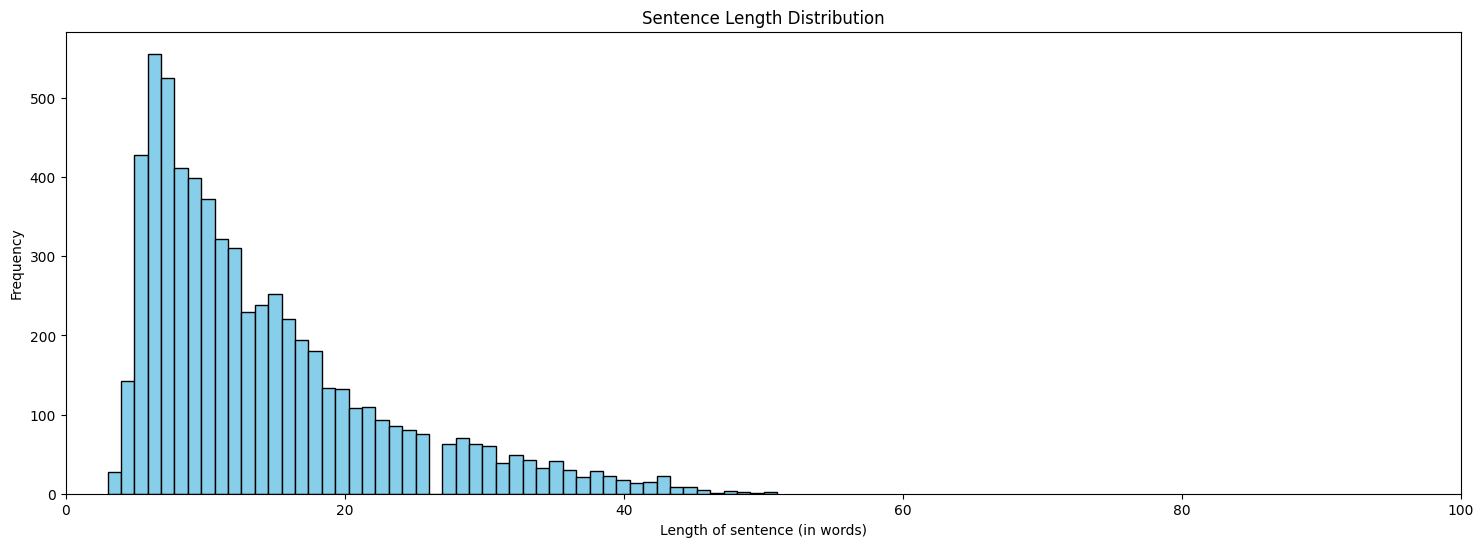

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculating length of each sentence without modifying the original DataFrame
# Calculating length of each sentence without modifying the original DataFrame
sentence_lengths = train_df['sentence1'].apply(lambda x: len(x.split()))

# Plotting the length distribution with more bins
plt.figure(figsize=(18, 6))
plt.hist(sentence_lengths, bins=50, color='skyblue', edgecolor='black')  # Adjusting bins to the number of unique lengths
plt.title('Sentence Length Distribution')
plt.xlabel('Length of sentence (in words)')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Setting the x-axis range from 0 to 150
plt.show()

In [35]:
train_size = len(train_df)
dev_size = len(validation_df)
test_size = len(test_df)

In [36]:
total = train_size + test_size + dev_size
train_percentage = (train_size / total) * 100
test_percentage = (test_size / total) * 100
dev_percentage = (dev_size / total) * 100

In [37]:
print(train_percentage, test_percentage, dev_percentage)

66.66313447070044 16.657836176751086 16.67902935254848


# Training
Modify the:
- --train_file {dir}
- --validation {dir}
- --test_file {dir}

If needed, adjust
- --learning_rate {number}
- --per_device_train_batch_size {int}
- --per_device_eval_batch_size {int}
- --max_seq_length {int}
- --num_train_epochs {int}

In [ ]:
!python banglabert/sequence_classification/sequence_classification.py \
    --model_name_or_path "csebuetnlp/banglabert" \
    --train_file '/content/MyDrive/MyDrive/Research/Thesis: BDA/Main/evaluation/sentnob/cleaned_original/train_100.csv' \
    --validation_file '/content/MyDrive/MyDrive/Research/Thesis: BDA/Main/evaluation/sentnob/cleaned_original/validation.csv' \
    --test_file '/content/MyDrive/MyDrive/Research/Thesis: BDA/Main/evaluation/sentnob/cleaned_original/test.csv' \
    --output_dir "/output/" \
    --learning_rate=2e-5 \
    --warmup_ratio 0.1 \
    --gradient_accumulation_steps 2 \
    --weight_decay 0.1 \
    --lr_scheduler_type "linear"  \
    --per_device_train_batch_size=8 \
    --per_device_eval_batch_size=8 \
    --max_seq_length 256 \
    --logging_strategy "epoch" \
    --evaluation_strategy "epoch" \
    --num_train_epochs=6 \
    --overwrite_output_dir \
    --do_train --do_eval --do_predict

2024-01-28 14:59:32.119149: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-28 14:59:32.119213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-28 14:59:32.121197: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-28 14:59:33.918586: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
01/28/2024 14:59:35 - WARNING - __main__ - Process rank: 0, device: cuda:0, n_gpu: 1distributed training: True, 16-bits training: False
[WARNING|modeling_utils.py:3952] 2024-01-28 14:59:42,057 >> Some weights of ElectraForSequenceClassificat

# Instruction
Add the Predict output to notion
https://www.notion.so/tariq190041101/Results-34ba8a1c07474cb2b2d85d01c0f39e3f?pvs=4